In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload

In [2]:
#import function to do single simulation
from MeanField.MeanFieldSimulation import single_simulation
from FockStateSimulation import main

In [3]:
N=10000
tf = .08
dt = .1e-4
pulses1 = []

In [9]:
% run CoherentStateChebyshev/spinorf.py
data2 = np.loadtxt('results.txt',skiprows = 18)

[                                                  ] 0%

C:\Users\Administrator\Documents\MySpinorSim\CoherentStateChebyshev\spinorf.py:113: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  e_min,e_max,d,e,first_n0 = setup_scaled_H(eqz + emw[0],c[0],atom_n,m,n_max)
C:\Users\Administrator\Documents\MySpinorSim\CoherentStateChebyshev\spinorf.py:153: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  e_min,e_max,d,e, first_n0 =setup_scaled_H(q,c[interval], atom_n, m,n_max)


[##################################################]100%
Calculation Complete
Norm recovered 0.0438521850965
Time for Calculation: 374.6162040233612
File written to: results.txt


In [4]:
data = single_simulation(N,1000,24*np.pi*4,tf,dt,pulses1,plot = False,qu1=-5*np.pi)

[##################################################]100% Evolve
Calculation Finished in time: 110.54


In [5]:
simulation_params = {
    'total_time': .08, #simulated time (s),
    'mag_time':0.015,
    'dt':0.001e-3, #simulation time step,
    'tauB' : 1e-3,
    'c':24*np.pi*4,
    'n_atoms':10000,
    'plot':False
    }
dataf = main(**simulation_params)

[##################################################]100%
 simulation complete


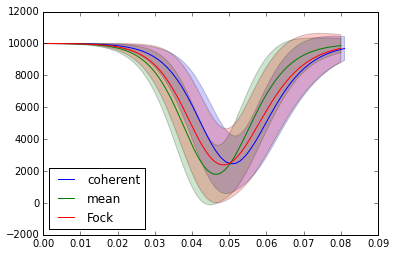

In [10]:
m = data2[:,1]
s = data2[:,2]
plt.plot(data2[:,0],data2[:,1],label='coherent')
plt.fill_between(data2[:,0],m-s,m+s,facecolor='blue',alpha=0.2)
plt.plot(data[0],data[1]*N,label='mean')
plt.fill_between(data[0],(data[1]-data[2])*N,(data[1]+data[2])*N,facecolor='green',alpha=0.2)
plt.plot(dataf[0],dataf[1],label = 'Fock')
plt.fill_between(dataf[0],dataf[1]-np.sqrt(dataf[2]),dataf[1]+np.sqrt(dataf[2]),facecolor='red',alpha=0.2)
plt.legend(loc=3)

In [ ]:
print(dataf[1][0],data2[:,1][0],data[1][0]*N)